# Plotting Simple Moving Average & Exponential Moving Average

In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# get market info for bitcoin from the start of 2013 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
# look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-04-06,5036.79,5205.82,4992.22,5059.82,16929795194,89212733450
1,2019-04-05,4922.81,5053.51,4919.49,5036.68,16837325387,88796118650
2,2019-04-04,4971.31,5063.16,4836.79,4922.80,18251810240,86778727821
3,2019-04-03,4879.96,5307.00,4876.62,4973.02,22899891582,87655288145
4,2019-04-02,4156.92,4905.95,4155.32,4879.88,21315047816,85986009273


In [2]:
bitcoin_market_info.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2170.000000,2170.000000,2170.00000,2170.000000,2.170000e+03,2.170000e+03
mean,2376.177286,2445.449037,2299.42094,2378.281184,1.800390e+09,3.957771e+10
std,3356.107504,3477.255851,3209.18652,3356.038858,3.355989e+09,5.721657e+10
min,68.500000,74.560000,65.53000,68.430000,0.000000e+00,7.784112e+08
25%,338.852500,351.000000,329.60250,338.517500,1.960345e+07,4.754909e+09
50%,622.750000,632.950000,612.09000,623.595000,6.521740e+07,9.091367e+09
75%,3720.792500,3868.400000,3646.28250,3739.167500,2.401198e+09,6.454037e+10
max,19475.800000,20089.000000,18974.10000,19497.400000,2.384090e+10,3.265025e+11


In [3]:
df = pd.DataFrame(bitcoin_market_info[['Close','Date']])
df.set_index('Date', inplace=True)
df = df.sort_index()

# Simple Moving Average

Calculating moving average for window sizes of 10 and 20 days.
A classic algorithm used in this problem is the Moving Average (MA). It consists in calculating the average of the m past observed days and uses this result as the next day prediction.

In [6]:
df['MA_window_10'] = df['Close'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
df['MA_window_20'] = df['Close'].rolling(20).mean().shift()

In [7]:
df = df.sort_index()
df

,Close,MA_window_10,MA_window_20
Date,,,
2013-04-28,134.21,NaN,NaN
2013-04-29,144.54,NaN,NaN
2013-04-30,139.00,NaN,NaN
2013-05-01,116.99,NaN,NaN
2013-05-02,105.21,NaN,NaN
2013-05-03,97.75,NaN,NaN
2013-05-04,112.50,NaN,NaN
2013-05-05,115.91,NaN,NaN
2013-05-06,112.30,NaN,NaN


# Close price SMA window of 10 and 20 days 

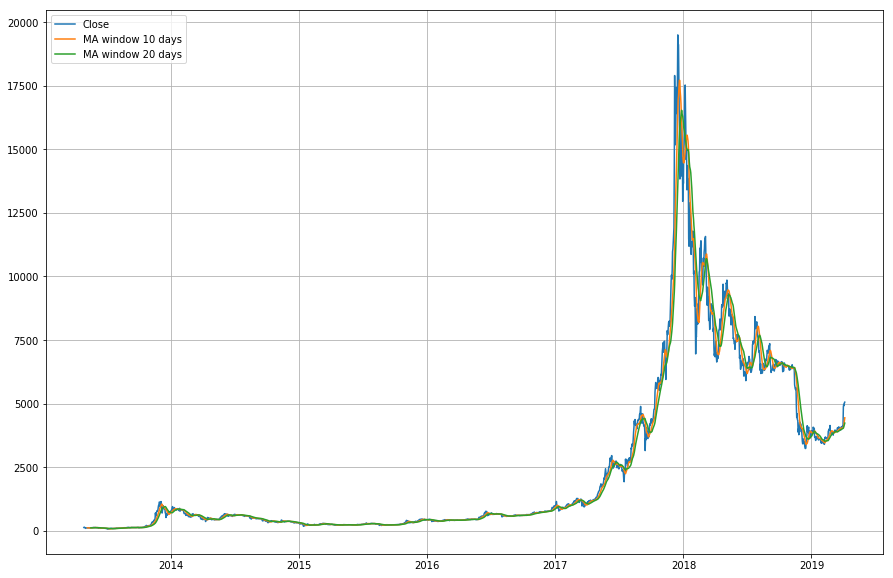

In [8]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'], label='Close')
plt.plot(df['MA_window_10'], label='MA window 10 days')
plt.plot(df['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

# Taking a closer look to most recent days

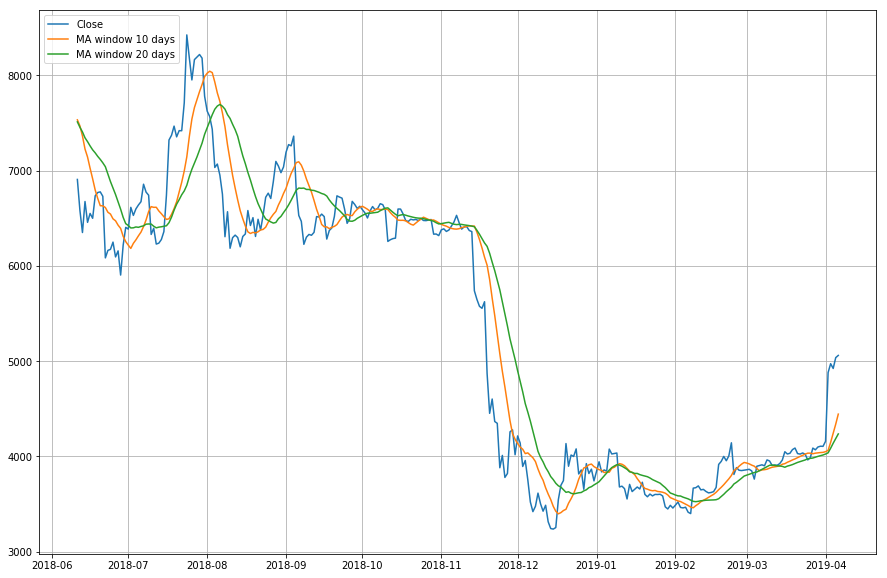

In [9]:
limit = 300

plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close')
plt.plot(df['MA_window_10'][-limit:], label='MA window 10 days')
plt.plot(df['MA_window_20'][-limit:], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

# Predicting n days in a row with SMA

In [14]:
df['MA_window_10_forward_10'] = np.NaN

In [15]:
def make_window(window_size, start_point):
    return [start_point+x for x in range(window_size)]

In [16]:
window_size = 10
forward_days = 10
for index in range(window_size, len(df), forward_days):   #range(start,end,step)
    for i in range(0,forward_days):
        if index+i >= len(df):
            break
        window_close = make_window(window_size-i, index+i-window_size)
        #print(window_close)
        window_MA = make_window(i, index)
        #print(window_MA)
        mean = pd.concat([ df['Close'].iloc[window_close], df['MA_window_10_forward_10'].iloc[window_MA] ]).mean(axis=0)
        df.iat[index+i, df.columns.get_loc('MA_window_10_forward_10')] = mean

In [17]:
df.head(20)

,Close,MA_window_10,MA_window_20,MA_window_10_forward_10
Date,,,,
2013-04-28,134.21,NaN,NaN,NaN
2013-04-29,144.54,NaN,NaN,NaN
2013-04-30,139.00,NaN,NaN,NaN
2013-05-01,116.99,NaN,NaN,NaN
2013-05-02,105.21,NaN,NaN,NaN
2013-05-03,97.75,NaN,NaN,NaN
2013-05-04,112.50,NaN,NaN,NaN
2013-05-05,115.91,NaN,NaN,NaN
2013-05-06,112.30,NaN,NaN,NaN


# Plotting the results

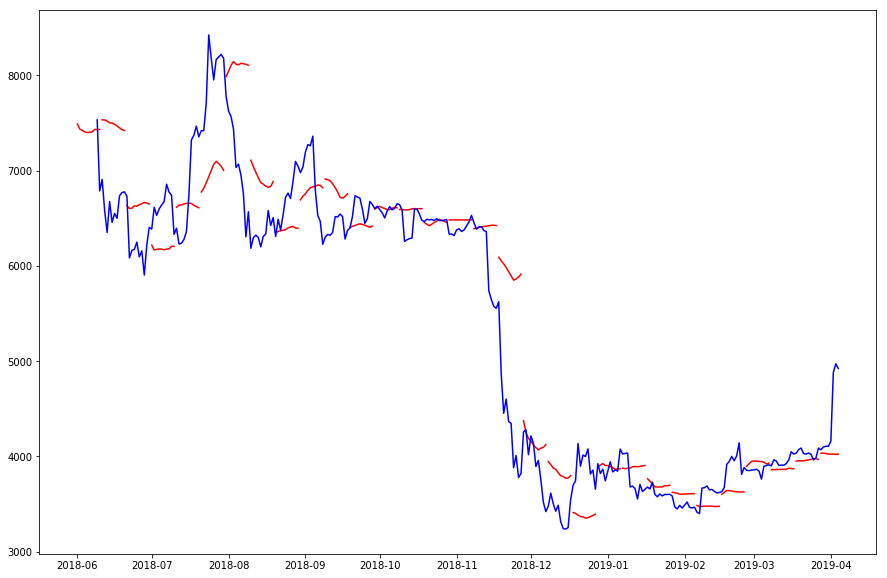

In [19]:
plt.figure(figsize = (15,10))
size = len(df)-limit - (len(df)-limit)%forward_days
for index in range(size, len(df), forward_days):
    plt.plot(df['MA_window_10_forward_10'][index:index+forward_days], color='r')

plt.plot(df['Close'][-limit:], color='b', label='Close')
#plt.legend(loc='best')
plt.show()

Notice that each red line represents a 10 day prediction based on the 10 past days. For this reason, the red line is discontinuous.

# Exponential Moving Average

Initial SMA: 10-period sum / 10 
    
Multiplier: (2 / (Time periods + 1) ) = (2 / (10 + 1) ) = 0.1818 (18.18%) 
    
EMA: {Close - EMA(previous day)} x multiplier + EMA(previous day). 

In [21]:
df['EMA_DayByDay'] = np.NaN 

window_size = 10
multiplier = 2 / (window_size + 1)  

#for the first value we use the SMA
window = make_window(window_size, 0)
EMA_prev = df['Close'].iloc[window].mean(axis=0)
df.iat[window_size, df.columns.get_loc('EMA_DayByDay')] = EMA_prev
df

for index in range(window_size+1, len(df)):
    EMA = (df['Close'].iloc[index-1] - EMA_prev) * multiplier + EMA_prev
    df.iat[index, df.columns.get_loc('EMA_DayByDay')] = EMA
    EMA_prev = EMA

df

,Close,MA_window_10,MA_window_20,MA_window_10_forward_10,EMA_DayByDay
Date,,,,,
2013-04-28,134.21,NaN,NaN,NaN,NaN
2013-04-29,144.54,NaN,NaN,NaN,NaN
2013-04-30,139.00,NaN,NaN,NaN,NaN
2013-05-01,116.99,NaN,NaN,NaN,NaN
2013-05-02,105.21,NaN,NaN,NaN,NaN
2013-05-03,97.75,NaN,NaN,NaN,NaN
2013-05-04,112.50,NaN,NaN,NaN,NaN
2013-05-05,115.91,NaN,NaN,NaN,NaN
2013-05-06,112.30,NaN,NaN,NaN,NaN


# Close price with Day by Day EMA

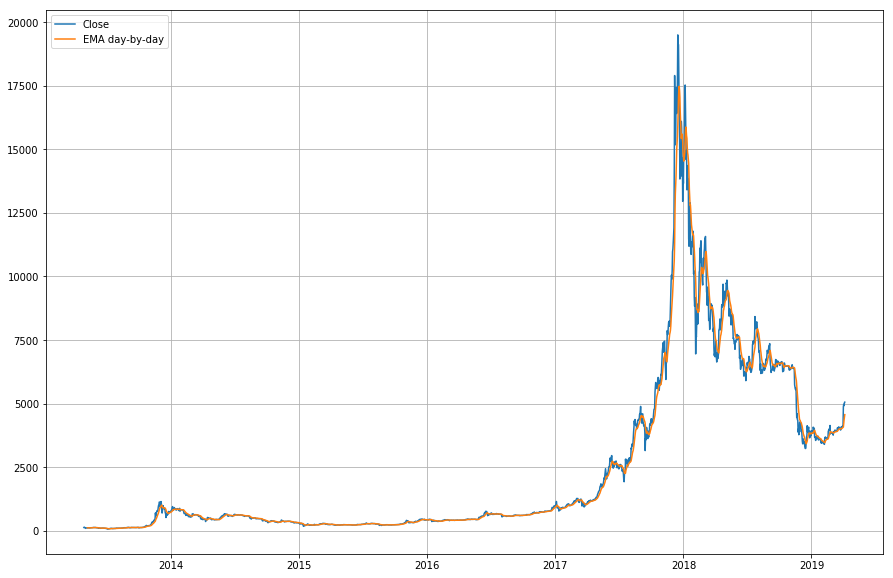

In [22]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'], label='Close')
plt.plot(df['EMA_DayByDay'], label='EMA day-by-day')
plt.legend(loc=2)
plt.show()

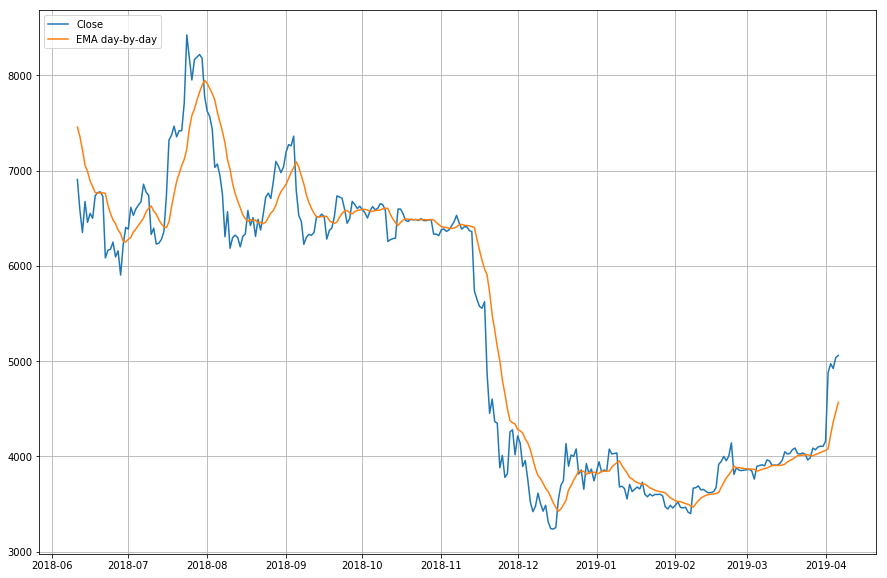

In [23]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close')
plt.plot(df['EMA_DayByDay'][-limit:], label='EMA day-by-day')
plt.legend(loc=2)
plt.show()

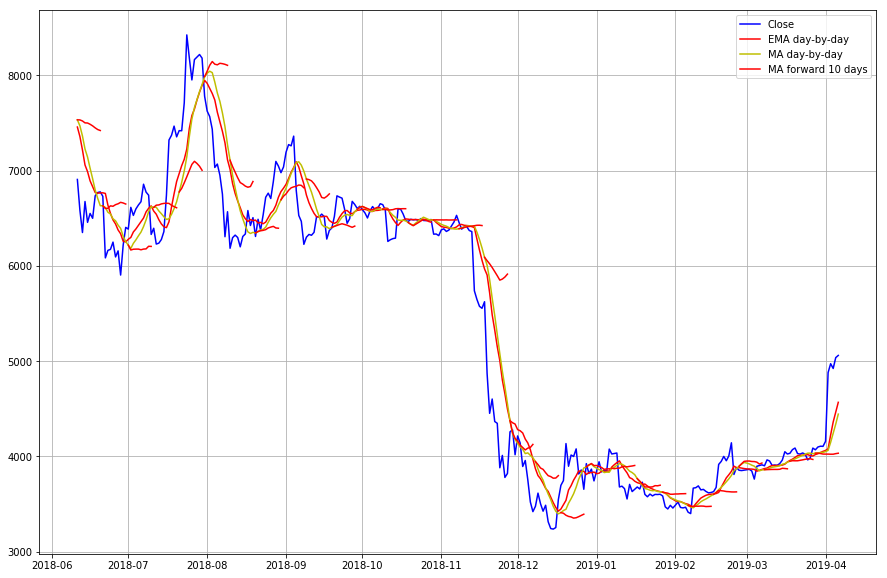

In [24]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'][-limit:], label='Close', color='b')
plt.plot(df['EMA_DayByDay'][-limit:], label='EMA day-by-day', color='r')
plt.plot(df['MA_window_10'][-limit:], label='MA day-by-day', color='y')

#Show the MA prediction
size = len(df)-limit - (len(df)-limit)%forward_days
for index in range(size, len(df), forward_days):
    plt.plot(df['MA_window_10_forward_10'][index:index+forward_days], color='r', label='')
plt.plot(df['MA_window_10_forward_10'][len(df)-1:], color='r', label='MA forward 10 days') #only to place the legend

plt.legend(loc='best')
plt.show()

We see both EMA and MA should not be considered as good market indicators. However,we find EMA is slightly better than SMA.